## Chapter 04. Pre-trained Model

### Deep Learning Model (Pre-trained) with CIFAR-10
#### Convolution Neural Network Based

In [1]:
''' 1. Module Import '''
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

In [2]:
''' 2. 딥러닝 모델을 설계할 때 활용하는 장비 확인 '''
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')
print('Using PyTorch version:', torch.__version__, ' Device:', DEVICE)

Using PyTorch version: 2.1.0+cu118  Device: cuda


In [3]:
BATCH_SIZE = 32
EPOCHS = 10

In [4]:
''' 3. Data Augmentation이 적용된 CIFAR10 데이터 다운로드 (Train set, Test set 분리하기) '''
train_dataset = datasets.CIFAR10(root = "./data/CIFAR_10",
                                  train = True,
                                  download = True,
                                  transform = transforms.Compose([
                                    transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

test_dataset = datasets.CIFAR10(root = "./data/CIFAR_10",
                                train = False,
                                transform = transforms.Compose([
                                    # transforms.RandomHorizontalFlip(),
                                    transforms.ToTensor(),
                                    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]))

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                            batch_size = BATCH_SIZE,
                                            shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

Files already downloaded and verified


In [5]:
''' 4. 데이터 확인하기 (1) '''
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 3, 32, 32]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

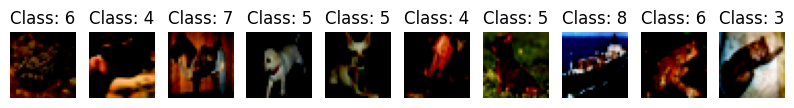

In [6]:
''' 5. 데이터 확인하기 (2) '''
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('Class: ' + str(y_train[i].item()))

- `torchvision.models` 에서 model을 불러오기
  - PyTorch 에서 제공하는 모델 목록 확인
    - https://pytorch.org/vision/stable/models.html
  - `models.resnet34(pretrained = False)`
    - `pretrained = True` : ImageNet 데이터셋으로 미리 학습한 파라미터를 사용할 경우
      - 이 경우, 불러온 파라미터는 ImageNet 데이터셋을 잘 분류할 수 있게 학습되어 있음
    - `pretrained = False` : 모델 구조만 불러올 경우 (특정 initializer에서 랜덤 샘플링한 값을 초기값으로 사용)

#### ResNet

In [7]:
''' 6. PyTorch 내에서 제공하는 ResNet34 모델 불러온 후 FC 층 추가 및 Output 크기 설정하기 '''
import torchvision.models as models
model = models.resnet34(pretrained = False)
num_ftrs = model.fc.in_features # resnet34의 Fully connected layer input에 해당하는 노드 수를 num_ftrs 변수에 저장 
model.fc = nn.Linear(num_ftrs, 10) # CIFAR-10 데이터셋의 클래스 갯수 만큼 output을 생성할 수 있도록 Fully connected layer 구성
model = model.cuda() # 모델을 CUDA를 사용해 GPU 상에 올림

c:\Users\lucky\anaconda3\envs\TEST\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\lucky\anaconda3\envs\TEST\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [8]:
''' 7. Optimizer, Objective Function 설정하기 '''
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [9]:
''' 8. 불러온 Resnet34 모델 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))

In [10]:
''' 9. 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

- 학습 결과 테스트 데이터셋의 정확도 78% 달성

In [11]:
''' 10. 불러온 ResNet34 학습 실행하며 Train, Test set의 Loss 및 Test set Accuracy 확인하기 '''
for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/50000 (0%)]	Train Loss: 2.498473
Train Epoch: 1 [6400/50000 (13%)]	Train Loss: 1.798806
Train Epoch: 1 [12800/50000 (26%)]	Train Loss: 1.497935
Train Epoch: 1 [19200/50000 (38%)]	Train Loss: 1.341076
Train Epoch: 1 [25600/50000 (51%)]	Train Loss: 1.303234
Train Epoch: 1 [32000/50000 (64%)]	Train Loss: 1.079057
Train Epoch: 1 [38400/50000 (77%)]	Train Loss: 1.423469
Train Epoch: 1 [44800/50000 (90%)]	Train Loss: 0.993318

[EPOCH: 1], 	Test Loss: 0.0402, 	Test Accuracy: 56.29 % 

Train Epoch: 2 [0/50000 (0%)]	Train Loss: 1.159064
Train Epoch: 2 [6400/50000 (13%)]	Train Loss: 1.066831
Train Epoch: 2 [12800/50000 (26%)]	Train Loss: 1.152529
Train Epoch: 2 [19200/50000 (38%)]	Train Loss: 0.901112
Train Epoch: 2 [25600/50000 (51%)]	Train Loss: 1.152981
Train Epoch: 2 [32000/50000 (64%)]	Train Loss: 0.955162
Train Epoch: 2 [38400/50000 (77%)]	Train Loss: 1.191886
Train Epoch: 2 [44800/50000 (90%)]	Train Loss: 0.871088

[EPOCH: 2], 	Test Loss: 0.0428, 	Test Accuracy: 56.92 % 

- `models.resnet34(pretrained = True)` 사용
  - 10 epochs 학습하여 테스트 데이터셋으로 성능 측정 결과, 분류 정확도 81% 기록

In [12]:
''' 11. IMAGENET 데이터로 학습이 된 ResNet34 모델을 불러온 후 Fine Tuning 해보기 '''
model = models.resnet34(pretrained = True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 10)
model = model.cuda()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

c:\Users\lucky\anaconda3\envs\TEST\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Train Epoch: 1 [0/50000 (0%)]	Train Loss: 2.457305
Train Epoch: 1 [6400/50000 (13%)]	Train Loss: 0.995940
Train Epoch: 1 [12800/50000 (26%)]	Train Loss: 0.845803
Train Epoch: 1 [19200/50000 (38%)]	Train Loss: 1.061962
Train Epoch: 1 [25600/50000 (51%)]	Train Loss: 1.145762
Train Epoch: 1 [32000/50000 (64%)]	Train Loss: 0.972211
Train Epoch: 1 [38400/50000 (77%)]	Train Loss: 0.645719
Train Epoch: 1 [44800/50000 (90%)]	Train Loss: 0.850142

[EPOCH: 1], 	Test Loss: 0.0252, 	Test Accuracy: 72.72 % 

Train Epoch: 2 [0/50000 (0%)]	Train Loss: 0.756255
Train Epoch: 2 [6400/50000 (13%)]	Train Loss: 0.726982
Train Epoch: 2 [12800/50000 (26%)]	Train Loss: 0.778740
Train Epoch: 2 [19200/50000 (38%)]	Train Loss: 0.592036
Train Epoch: 2 [25600/50000 (51%)]	Train Loss: 0.571744
Train Epoch: 2 [32000/50000 (64%)]	Train Loss: 0.631908
Train Epoch: 2 [38400/50000 (77%)]	Train Loss: 0.896777
Train Epoch: 2 [44800/50000 (90%)]	Train Loss: 0.686477

[EPOCH: 2], 	Test Loss: 0.0235, 	Test Accuracy: 74.58 % 

### Transfer Learning Prac
- 개미 & 벌 이미지 학습 및 분류

- Kaggle API Token 다운로드하여 업로드
  - https://www.kaggle.com/ 접속하여 로그인 후, 계정 page - accounts 에 들어가서 다운로드
- Kaggle package 사용하여 https://www.kaggle.com/ajayrana/hymenoptera-data 의 데이터셋 다운로드

In [ ]:
from google.colab import files
!pip install -q kaggle
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d ajayrana/hymenoptera-data

In [ ]:
!ls

- 다운로드한 데이터셋 압축 해제

In [ ]:
!unzip hymenoptera-data.zip

- 압축 해제한 파일 중 일부 파일 경로 수정

In [ ]:
! mv hymenoptera_data/hymenoptera_data/train/bees/* hymenoptera_data/train/bees/ 
! mv hymenoptera_data/hymenoptera_data/train/ants/* hymenoptera_data/train/ants/
! mv hymenoptera_data/hymenoptera_data/val/bees/* hymenoptera_data/val/bees/
! mv hymenoptera_data/hymenoptera_data/val/ants/* hymenoptera_data/val/ants/
! rm -r hymenoptera_data/hymenoptera_data/

- ImageNet 데이터셋의 RGB Pixel 평균, 표준편차 사용하여 정규화
  - Github 제공 원본 실습파일에서는 평균, 표준편차 둘 다 `[0.5, 0.5, 0.5]`로 되어 있음

In [13]:
''' 개미와 벌을 분류하기 위해 개미 이미지 데이터와 벌 이미지 데이터 불러오기 (Train set, Test set 분리하기) '''
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # ImageNet 데이터셋의 RGB Pixel값 평균과 표준편차 사용
    ]),
    'val': transforms.Compose([
        transforms.CenterCrop(224),
        transforms.Resize(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # ImageNet 데이터셋의 RGB Pixel값 평균과 표준편차 사용
    ]),
}

image_datasets = {x: datasets.ImageFolder("./data/hymenoptera_data", data_transforms[x]) for x in ['train', 'val']}
# dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size = BATCH_SIZE, num_workers = 0, shuffle = True) for x in ['train', 'val']}
dataloaders = {}
for x in ['train', 'val']:
  if x == 'train':
    dataloaders[x] = torch.utils.data.DataLoader(image_datasets[x], batch_size = BATCH_SIZE, num_workers = 0, shuffle = True)
  else:
    dataloaders[x] = torch.utils.data.DataLoader(image_datasets[x], batch_size = BATCH_SIZE, num_workers = 0, shuffle = False)  

In [14]:
''' 데이터 확인하기 (1) '''
for (X_train, y_train) in dataloaders['train']:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([32, 3, 224, 224]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

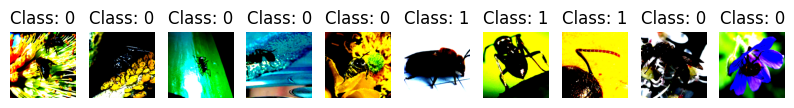

In [15]:
''' 데이터 확인하기 (2) '''
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(np.transpose(X_train[i], (1, 2, 0)))
    plt.title('Class: ' + str(y_train[i].item()))

In [16]:
''' 불러온 특정 모델에 대하여 학습을 진행하며 학습 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def train(model, train_loader, optimizer, log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output, label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0:
            print("Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}".format(
                epoch, batch_idx * len(image), 
                len(train_loader.dataset), 100. * batch_idx / len(train_loader), 
                loss.item()))

In [17]:
''' 학습되는 과정 속에서 검증 데이터에 대한 모델 성능을 확인하는 함수 정의 '''
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()
    
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

- 개미 & 벌 클래스 2개이기 때문에 Fully connected layer output 노드 수 2개로 설정
  - 1개로 설정 후 `nn.BCEWithLogitsLoss()`로도 학습 가능. 단, 차원을 맞춰주어야 하고 label의 type을 float로 변경해주어야 함

In [18]:
''' PyTorch 내에서 제공하는 미리 학습되지 않은 ResNet18 모델 불러온 후 Output 크기 설정하기 '''
import torchvision.models as models

model = models.resnet18(pretrained = False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.cuda()

c:\Users\lucky\anaconda3\envs\TEST\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\lucky\anaconda3\envs\TEST\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


In [19]:
''' Optimizer, Objective Function 설정하기 '''
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
criterion = nn.CrossEntropyLoss()

print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

- 미리 학습되지 않은 ResNet18 학습 시 60% 내외의 분류 성능을 확인할 수 있음

In [20]:
''' 미리 학습되지 않은 ResNet18 학습 실행하며 Train, Test set의 Loss 및 Test set Accuracy 확인하기 '''
for epoch in range(1, EPOCHS + 1):
    train(model, dataloaders["train"], optimizer, log_interval = 5)
    test_loss, test_accuracy = evaluate(model, dataloaders["val"])
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, test_loss, test_accuracy))

Train Epoch: 1 [0/397 (0%)]	Train Loss: 0.739618
Train Epoch: 1 [160/397 (38%)]	Train Loss: 1.083069
Train Epoch: 1 [320/397 (77%)]	Train Loss: 0.712792

[EPOCH: 1], 	Test Loss: 0.3201, 	Test Accuracy: 61.46 % 

Train Epoch: 2 [0/397 (0%)]	Train Loss: 0.796102
Train Epoch: 2 [160/397 (38%)]	Train Loss: 0.700507
Train Epoch: 2 [320/397 (77%)]	Train Loss: 1.007341

[EPOCH: 2], 	Test Loss: 0.0497, 	Test Accuracy: 59.95 % 

Train Epoch: 3 [0/397 (0%)]	Train Loss: 0.662982
Train Epoch: 3 [160/397 (38%)]	Train Loss: 0.734996
Train Epoch: 3 [320/397 (77%)]	Train Loss: 0.653988

[EPOCH: 3], 	Test Loss: 0.0223, 	Test Accuracy: 61.46 % 

Train Epoch: 4 [0/397 (0%)]	Train Loss: 0.628712
Train Epoch: 4 [160/397 (38%)]	Train Loss: 0.565091
Train Epoch: 4 [320/397 (77%)]	Train Loss: 0.687487

[EPOCH: 4], 	Test Loss: 0.0219, 	Test Accuracy: 62.22 % 

Train Epoch: 5 [0/397 (0%)]	Train Loss: 0.686913
Train Epoch: 5 [160/397 (38%)]	Train Loss: 0.692580
Train Epoch: 5 [320/397 (77%)]	Train Loss: 0.693665

- Fine-tuning 시 90% 이상의 분류성능을 확인할 수 있음

In [21]:
''' IMAGENET 데이터로 미리 학습이 된 ResNet18 모델을 불러온 후 개미, 벌 이미지 데이터에 맞게 Fine Tuning 해보기 '''
model = models.resnet18(pretrained = True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 2)
model = model.cuda()

optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)
EPOCHS = 10
for epoch in range(1, EPOCHS + 1):
    train(model, dataloaders["train"], optimizer, log_interval = 5)
    valid_loss, valid_accuracy = evaluate(model, dataloaders["val"])
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} % \n".format(
        epoch, valid_loss, valid_accuracy))

c:\Users\lucky\anaconda3\envs\TEST\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Train Epoch: 1 [0/397 (0%)]	Train Loss: 0.740333
Train Epoch: 1 [160/397 (38%)]	Train Loss: 0.699526
Train Epoch: 1 [320/397 (77%)]	Train Loss: 0.918915

[EPOCH: 1], 	Test Loss: 0.0199, 	Test Accuracy: 70.03 % 

Train Epoch: 2 [0/397 (0%)]	Train Loss: 0.672497
Train Epoch: 2 [160/397 (38%)]	Train Loss: 0.575281
Train Epoch: 2 [320/397 (77%)]	Train Loss: 0.409405

[EPOCH: 2], 	Test Loss: 0.0180, 	Test Accuracy: 71.03 % 

Train Epoch: 3 [0/397 (0%)]	Train Loss: 0.518969
Train Epoch: 3 [160/397 (38%)]	Train Loss: 0.491153
Train Epoch: 3 [320/397 (77%)]	Train Loss: 0.444894

[EPOCH: 3], 	Test Loss: 0.0138, 	Test Accuracy: 83.12 % 

Train Epoch: 4 [0/397 (0%)]	Train Loss: 0.397875
Train Epoch: 4 [160/397 (38%)]	Train Loss: 0.459931
Train Epoch: 4 [320/397 (77%)]	Train Loss: 0.583051

[EPOCH: 4], 	Test Loss: 0.0120, 	Test Accuracy: 84.89 % 

Train Epoch: 5 [0/397 (0%)]	Train Loss: 0.218384
Train Epoch: 5 [160/397 (38%)]	Train Loss: 0.356765
Train Epoch: 5 [320/397 (77%)]	Train Loss: 0.410624

### Recurruent Neural Network Based

### 기초부터 시작하는 NLP:  문자-단위 RNN으로 이름 생성하기
********************************************************************************
**Author**: `Sean Robertson <https://github.com/spro/practical-pytorch>`_
  **번역**: `황성수 <https://github.com/adonisues>`_


::

    > python sample.py Russian RUS
    Rovakov
    Uantov
    Shavakov

    > python sample.py German GER
    Gerren
    Ereng
    Rosher

    > python sample.py Spanish SPA
    Salla
    Parer
    Allan

    > python sample.py Chinese CHI
    Chan
    Hang
    Iun

이번 실습은 언어를 입력하고 한 번에 한 글자를 생성하여 출력하는 것입니다.
언어 형성(단어 또는 다른 고차원 구조로도 수행 될 수 있음)을 위해
문자를 반복적으로 예측하는 것을 "언어 모델" 이라고 합니다.


#### 데이터 준비
==================

.. Note::
   [여기](https://download.pytorch.org/tutorial/data.zip)
   에서 데이터를 다운 받고, 현재 디렉토리에 압축을 푸십시오.

이 과정의 더 자세한 사항은 지난 튜토리얼을 보십시오.
요약하면, 줄마다 이름이 적힌 텍스트 파일 ``data/names/[Language].txt`` 있습니다.
이것을 어레이로 분리하고, Unicode를 ASCII로 변경하고,
사전 ``{language: [names ...]}`` 을 만들어서 마무리합니다.

In [ ]:
%matplotlib inline

# 데이터 다운로드 및 압축 해제 명령어
!wget https://download.pytorch.org/tutorial/data.zip
!unzip data.zip
# names 라는 directory 밑에 각각의 언어로 txt 파일 생성
# 각각의 언어로 영어 알파벳으로 성을 표현해놓은 파일

In [23]:
from __future__ import unicode_literals, print_function, division
from io import open
import glob
import os
import unicodedata
import string

all_letters = string.ascii_letters + " .,;'-" # 모든 문자열을 호출한 뒤 몇가지 문자열을 추가
n_letters = len(all_letters) + 1 # EOS(end of sentence) 기호 추가

def findFiles(path): return glob.glob(path) # 파일을 찾기 위한 함수 (path의 파일을 불러옴)

# 유니코드 문자열을 ASCII로 변환, https://stackoverflow.com/a/518232/2809427
def unicodeToAscii(s):
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn'
        and c in all_letters
    )

# 파일을 읽고 줄 단위로 분리 (파일경로를 함수에 입력)
def readLines(filename):
    with open(filename, encoding='utf-8') as some_file:
        return [unicodeToAscii(line.strip()) for line in some_file] # 파일을 라인별로 읽은 뒤 공백 제거

# 각 언어의 이름 목록인 category_lines 사전 생성
category_lines = {}
all_categories = []
for filename in findFiles('./data/names/*.txt'):
    category = os.path.splitext(os.path.basename(filename))[0] # filename을 토대로 언어만 분리
    all_categories.append(category) # 언어별로 category에 추가
    lines = readLines(filename)
    category_lines[category] = lines # 딕셔너리에 카테고리 key 값에 해당하는 언어별로 line(ASCii 코드로 변환)이 추가

n_categories = len(all_categories)

if n_categories == 0:
    raise RuntimeError('Data not found. Make sure that you downloaded data '
        'from https://download.pytorch.org/tutorial/data.zip and extract it to '
        'the current directory.')

print('# categories:', n_categories, all_categories)
print(unicodeToAscii("O'Néàl"))

# categories: 18 ['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese']
O'Neal


#### 네트워크 생성
====================

이 네트워크는 RNN이 다른 입력들과 연결되는 category tensor를 추가 인자로 가지게 확장합니다. category tensor는 문자 입력과 마찬가지로 one-hot 벡터입니다.

역자주: 기존 입력과 category tensor를 결합하여 입력으로 사용하기 때문에
입력의 사이즈가 n_categories 만큼 커집니다.

우리는 출력을 다음 문자의 확률로 해석 합니다. 샘플링 할 때,
가장 확률이 높은 문자가 다음 입력 문자로 사용됩니다.

더 나은 동작을 위해 두 번째 선형 레이어
``o2o`` (은닉과 출력을 결합한 후) 를 추가했습니다 .
또한 Drop-out 계층이 있습니다. 이 계층은 주어진 확률(여기서는 0.1)로
`무작위로 입력을 0`으로 만듭니다.
일반적으로 입력을 흐리게 해서 과적합을 막는 데 사용됩니다.
여기서 우리는 고의로 일부 혼돈을 추가하고 샘플링 다양성을 높이기
위해 네트워크의 마지막에 이것을 사용합니다.

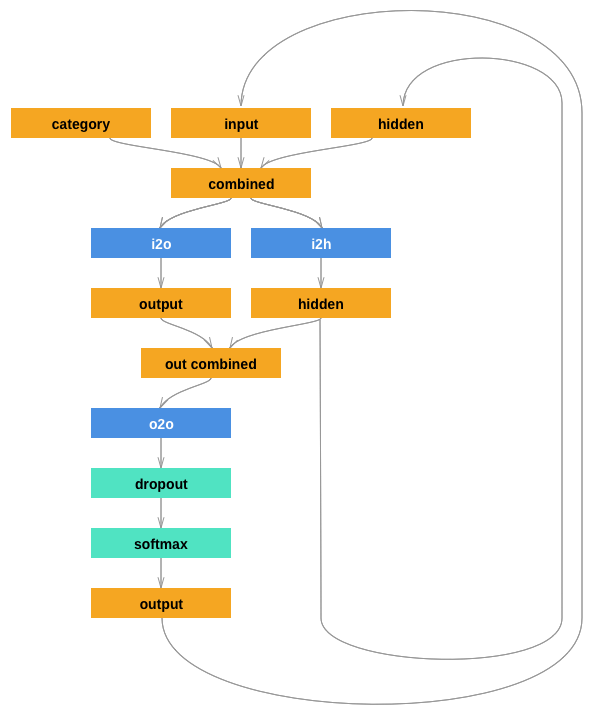

In [24]:
import torch
import torch.nn as nn

class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size # 은닉층 크기를 미리 지정

        self.i2h = nn.Linear(n_categories + input_size + hidden_size, hidden_size) # n_category와 입력, 은닉층 크기가 합쳐져서 은닉층 크기 형성
        self.i2o = nn.Linear(n_categories + input_size + hidden_size, output_size) # 출력 사이즈도 마찬가지
        self.o2o = nn.Linear(hidden_size + output_size, output_size) # 은닉층 크기와 출력층 크기를 합쳐 출력층 크기 형성
        self.dropout = nn.Dropout(0.1)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self, category, input, hidden):
        input_combined = torch.cat((category, input, hidden), 1) # (batch_size, vector_size)=vector size 축으로 결합, concatenate 진행
        hidden = self.i2h(input_combined)
        output = self.i2o(input_combined)
        output_combined = torch.cat((hidden, output), 1)
        output = self.o2o(output_combined)
        output = self.dropout(output)
        output = self.softmax(output)
        return output, hidden

    def initHidden(self):
        return torch.zeros(1, self.hidden_size) # 은닉층 초기화를 위한 함수

### 학습
=========
#### 학습 준비
----------------------

제일 먼저 (category, line)의 무작위 쌍을 얻는 함수:

In [25]:
import random

# 목록에서 무작위 아이템 반환
def randomChoice(l):
    return l[random.randint(0, len(l) - 1)] # 랜덤한 정수 하나를 추출해 indexing 진행

# 임의의 category 및 그 category에서 무작위 줄(이름) 얻기
def randomTrainingPair():
    category = randomChoice(all_categories) # category는 언어 종류를 의미
    line = randomChoice(category_lines[category]) # category lines는 언어별 이름의 리스트
    return category, line

각 시간 단계 마다 (즉, 학습 단어의 각 문자 마다) 네트워크의 입력은
``(언어, 현재 문자, 은닉 상태)`` 가 되고, 출력은
``(다음 문자, 다음 은닉 상태)`` 가 된다. 따라서 각 학습 세트 마다
언어, 입력 문자의 세트, 출력/목표 문자의 세트가 필요하다.

각 시간 단계마다 현재 문자에서 다음 문자를 예측하기 때문에,
문자 쌍은 한 줄(하나의 이름)에서 연속된 문자 그룹입니다. - 예를 들어 ``"ABCD<EOS>"`` 는
("A", "B"), ("B", "C"), ("C", "D"), ("D", "EOS") 로 생성합니다.

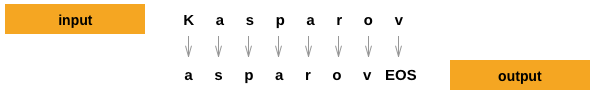

Category(언어) Tensor는 ``<1 x n_categories>`` 크기의 `One-hot
Tensor` 입니다.
학습시에 모든 시간 단계에서 네트워크에 이것을 전달합니다.
- 이것은 설계 선택사항으로, 초기 은닉 상태 또는
또 다른 전략의 부분으로 포함될 수 있습니다.

In [26]:
# Category를 위한 One-hot 벡터
def categoryTensor(category):
    li = all_categories.index(category)
    tensor = torch.zeros(1, n_categories)
    tensor[0][li] = 1
    return tensor

# 입력을 위한 처음부터 마지막 문자(EOS 제외)까지의  One-hot 행렬
def inputTensor(line):
    tensor = torch.zeros(len(line), 1, n_letters)
    for li in range(len(line)):
        letter = line[li]
        tensor[li][0][all_letters.find(letter)] = 1
    return tensor

# 목표를 위한 두번째 문자 부터 마지막(EOS) 까지의 LongTensor
def targetTensor(line):
    letter_indexes = [all_letters.find(line[li]) for li in range(1, len(line))]
    letter_indexes.append(n_letters - 1) # EOS
    return torch.LongTensor(letter_indexes) # 정답으로 활용하기 위한 LongTensor

학습 동안 편의를 위해 무작위로 (category[언어], line[이름])을 가져오고
그것을 필요한 형태 (category[언어], input[현재 문자], target[다음 문자]) Tensor로 바꾸는
``randomTrainingExample`` 함수를 만들 예정입니다.

In [27]:
# 임의의 Category에서 Category, Input, Target Tensor를 만듭니다.
def randomTrainingExample():
    category, line = randomTrainingPair()
    category_tensor = categoryTensor(category)
    input_line_tensor = inputTensor(line)
    target_line_tensor = targetTensor(line)
    return category_tensor, input_line_tensor, target_line_tensor

#### 네트워크 학습
--------------------

마지막 출력만 사용하는 분류와 달리, 모든 단계에서 예측을 수행하므로
모든 단계에서 손실을 계산합니다.

Autograd의 마법이 각 단계의 손실들을 간단하게 합하고 마지막에
역전파를 호출하게 해줍니다.

In [28]:
criterion = nn.NLLLoss() # Negative-Loglikelihood (손실함수 정의)

learning_rate = 0.0005 # 학습률 정의

def train(category_tensor, input_line_tensor, target_line_tensor):
    target_line_tensor.unsqueeze_(-1) # 차원의 크기가 1인 차원을 삭제 (차원 크기를 맞춰주기 위해 사용)
    hidden = rnn.initHidden() # RNN module 상의 은닉층 초기화 함수 (0으로 구성된 텐서를 생성)

    rnn.zero_grad()

    loss = 0

    for i in range(input_line_tensor.size(0)): # input_line_tensor 에 저장된 모든 line에 대해 실행
        output, hidden = rnn(category_tensor, input_line_tensor[i], hidden) # output 과 hidden 값 생성
        l = criterion(output, target_line_tensor[i])
        loss += l

    loss.backward() # loss function을 통해 학습 진행

    for p in rnn.parameters():
        p.data.add_(p.grad.data, alpha=-learning_rate) # 모든 parameter에 직접 업데이트 (=옵티마이저 정의)

    return output, loss.item() / input_line_tensor.size(0) # output 과 input_line_tensor 크기로 나눈 loss의 평균을 return

학습에 걸리는 시간을 추적하기 위해 사람이 읽을 수 있는 문자열을
반환하는``timeSince (timestamp)`` 함수를 추가합니다:

In [29]:
import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

학습은 일상적인 일입니다. - 몇번 train() 을 호출하고, 몇 분 정도
기다렸다가 ``print_every`` 마다 현재 시간과 손실을 출력하고,
나중에 도식화를 위해  ``plot_every`` 마다 ``all_losses`` 에
평균 손실을 저장합니다.

In [30]:
rnn = RNN(n_letters, 128, n_letters) # (input_size, hidden_size, output_size), 인스턴스 생성
# ascii code 의 모든 letter 에 문자열을 추가한 내용 + EOS 의 길이 = n_letters

# n_iters = 100000
n_iters = 60000 # 학습 횟수, 총 60000 line 사용, 랜덤하게 전체 데이터셋에서 생성하므로 epoch 개념 X (총 데이터 사용 X)
print_every = 5000
plot_every = 500
all_losses = []
total_loss = 0 # plot_every 마다 초기화

start = time.time()

for iter in range(1, n_iters + 1):
    output, loss = train(*randomTrainingExample())
    total_loss += loss

    if iter % print_every == 0:
        print('%s (%d %d%%) %.4f' % (timeSince(start), iter, iter / n_iters * 100, loss))

    if iter % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0

0m 10s (5000 8%) 2.8939
0m 21s (10000 16%) 2.4327
0m 32s (15000 25%) 2.2817
0m 43s (20000 33%) 1.7930
0m 53s (25000 41%) 2.4524
1m 4s (30000 50%) 1.8603
1m 14s (35000 58%) 3.3556
1m 24s (40000 66%) 2.8516
1m 34s (45000 75%) 2.2850
1m 45s (50000 83%) 2.2254
1m 56s (55000 91%) 3.3522
2m 7s (60000 100%) 2.6956


#### 손실 도식화
-------------------

all\_losses를 이용한 손실의 도식화는
네트워크의 학습 상태를 보여줍니다:

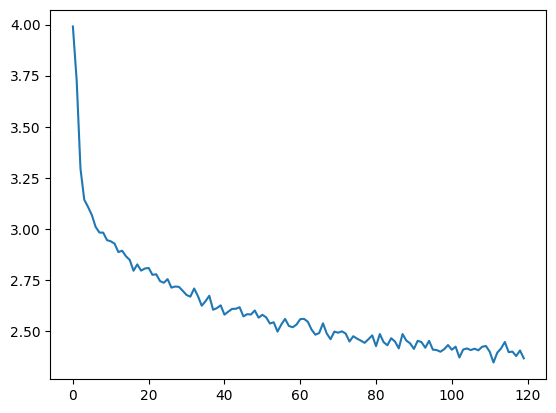

In [31]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(all_losses)

#### 네트워크 샘플링
====================

샘플링을 위해서, 네트워크에 하나의 글자를 주고 다음 문자를 물어보고
이것을 다음 문자로 전달하는 것을 EOS 토큰까지 반복합니다.

-  입력 카테고리(언어), 시작 문자, 비어 있는 은닉 상태를 위한 Tensor를 생성하십시오
-  시작 문자로 ``output_name`` 문자열을 생성하십시오
-  최대 출력 길이까지,

   -  현재 문자를 네트워크에 전달하십시오.
   -  가장 높은 출력에서 다음 문자와 다음 은닉 상태를 얻으십시오
   -  만일 문자가 EOS면, 여기서 멈추십시오
   -  만일 일반적인 문자라면, ``output_name`` 에 추가하고 계속하십시오

-  마지막 이름을 반환하십시오

.. Note::
   시작 문자를 주는 것 외에 "문자열 시작" 토큰을 학습에
   포함되게 하고 네트워크가 자체적으로 시작 문자를 선택하게 하는
   다른 방법도 있습니다.

In [32]:
max_length = 20

# 카테고리와 시작 문자로 부터 샘플링 하기
def sample(category, start_letter='A'):
    with torch.no_grad():  # 샘플링에서 히스토리를 추적할 필요 없음
        category_tensor = categoryTensor(category)
        input = inputTensor(start_letter)
        hidden = rnn.initHidden()

        output_name = start_letter

        for i in range(max_length):
            output, hidden = rnn(category_tensor, input[0], hidden)
            topv, topi = output.topk(1) # 확률순으로, 최상위 1개 추출
            topi = topi[0][0]
            if topi == n_letters - 1: # EOS 를 만날 시에 문자 생성 종료
                break
            else:
                letter = all_letters[topi]
                output_name += letter
            input = inputTensor(letter)

        return output_name

# 하나의 카테고리와 여러 시작 문자들로 여러 개의 샘플 얻기
def samples(category, start_letters='ABC'):
    for start_letter in start_letters:
        print(sample(category, start_letter))

samples('Russian', 'RUS')

samples('German', 'GER')

samples('Spanish', 'SPA')

samples('Chinese', 'CHI')

Rovakova
Ualovak
Sanovak
Ganerre
Eererer
Raner
Sanara
Pelea
Alara
Chan
Han
Ian


### Transformer

#### nn.Transformer와 torchtext로 언어 번역하기
======================================================

- 이 튜토리얼에서는 Transformer(트랜스포머)를 사용한 번역 모델을 바닥부터 학습하는 방법을 배워보겠습니다.
- [Multi30k](http://www.statmt.org/wmt16/multimodal-task.html#task1) 
  데이터셋을 사용하여 독일어(German)를 영어(English)로 번역하는 모델을 학습해보겠습니다.

#### 데이터 구하고 처리하기
----------------------------

[torchtext 라이브러리](https://pytorch.org/text/stable/) 에는 언어 번역 모델을
생성하기 위한 데이터셋을 쉽게 만들 수 있는 도구들이 있습니다.
이 튜토리얼에서는 torchtext의 내장(inbuilt) 데이터셋을 어떻게 사용하고,
원시(raw) 텍스트 문장을 토큰화(tokenize)하고, 토큰을 텐서로 수치화하는 방법을
살펴보겠습니다. 출발어(source)-도착어(target) 원시(raw) 문장을 생성하기 위해서는
torchtext 라이브러리의 [Multi30k 데이터셋](https://pytorch.org/text/stable/datasets.html#multi30k)
을 사용하겠습니다.

- (추가) `spaCy`를 활용한 Tokenization
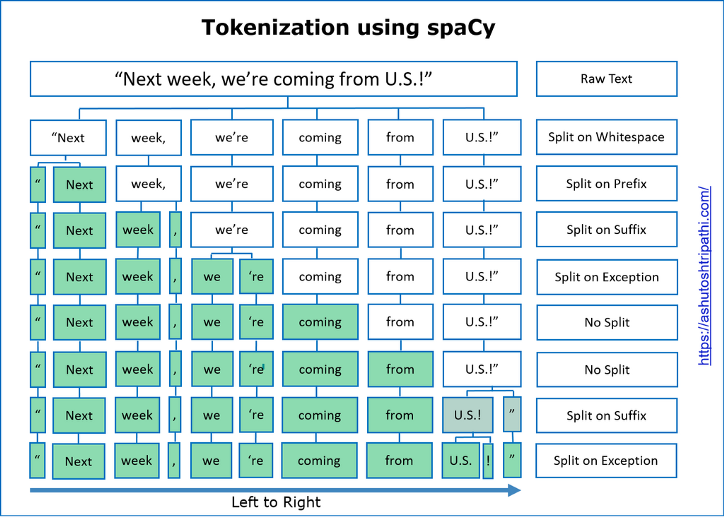

In [ ]:
# !pip torchtext
# !pip install -U spacy
# !python -m spacy download en_core_web_sm
# !python -m spacy download de_core_news_sm
# !pip install portalocker>=2.0.0

In [1]:
%matplotlib inline

from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator
from torchtext.datasets import Multi30k
from typing import Iterable, List


SRC_LANGUAGE = 'de'
TGT_LANGUAGE = 'en'

# Place-holders
token_transform = {} # 바꿔진 token과 vocabulary가 저장될 빈 dictionary
vocab_transform = {}


# 출발어(source)와 목적어(target)의 토크나이저(tokenizer)를 생성합니다.
# 아래 필요 사항(dependency)을 모두 설치해주세요.
# !pip install -U spacy
# !python -m spacy download en_core_web_sm
# !python -m spacy download de_core_news_sm
# 위 dependency 설치 후 Colab 런타임 다시 시작(ctrl+M)
token_transform[SRC_LANGUAGE] = get_tokenizer('spacy', language='de_core_news_sm')
# key : de (지정한 언어), value : get_tokenizer model
token_transform[TGT_LANGUAGE] = get_tokenizer('spacy', language='en_core_web_sm')

# 토큰 목록을 생성하기 위한 헬퍼(helper) 함수
def yield_tokens(data_iter: Iterable, language: str) -> List[str]:
    language_index = {SRC_LANGUAGE: 0, TGT_LANGUAGE: 1}

    for data_sample in data_iter:
        yield token_transform[language](data_sample[language_index[language]])

# 특수 기호(symbol)와 인덱스를 정의합니다
UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3
# 토큰들이 어휘집(vocab)에 인덱스 순서대로 잘 삽입되어 있는지 확인합니다
special_symbols = ['<unk>', '<pad>', '<bos>', '<eos>'] # Unknown, Padding, Beginning of the Seq, End of the Seq

for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    # 학습용 데이터 반복자(iterator)
    train_iter = Multi30k(split='train', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
    # torchtext의 Vocab(어휘집) 객체 생성
    vocab_transform[ln] = build_vocab_from_iterator(yield_tokens(train_iter, ln),
                                                    min_freq=1, # Vocabulary에 추가될 단어의 최소한의 단어 빈도
                                                    specials=special_symbols)

# UNK_IDX를 기본 인덱스로 설정합니다. 이 인덱스는 토큰을 찾지 못하는 경우에 반환됩니다.
# 만약 기본 인덱스를 설정하지 않으면 어휘집(Vocabulary)에서 토큰을 찾지 못하는 경우
# RuntimeError가 발생합니다.
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    vocab_transform[ln].set_default_index(UNK_IDX)

#### Transformer를 사용한 시퀀스-투-시퀀스(Seq2Seq) 신경망
------------------------------------------------------------

Transformer(트랜스포머)는 기계번역 작업(task)을 위해
[Attention is all you need](https://papers.nips.cc/paper/2017/file/3f5ee243547dee91fbd053c1c4a845aa-Paper.pdf)
논문에 소개된 Seq2Seq 모델입니다.
아래에서 Transformer를 사용한 Seq2Seq 신경망을 만들어보겠습니다.
신경망은 세 부분으로 구성되는데, 첫번째 부분은 임베딩 계층(embedding layer)입니다.
이 계층은 입력 인덱스의 텐서를 입력 임베딩의 해당하는 텐서로 변환합니다.
이러한 임베딩은 입력 토큰의 위치 정보(position information)를 모델에 전달하기 위해
위치 인코딩(positional encoding)을 추가합니다.
두번째 부분은 실제 [Transformer](https://pytorch.org/docs/stable/generated/torch.nn.Transformer.html) 모델입니다.
마지막으로 Transformer 모델의 출력을 선형 계층에 통과시켜 도착어의 각 토큰에 대한 확률을 제공합니다.

In [2]:
from torch import Tensor
import torch
import torch.nn as nn
from torch.nn import Transformer
import math
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 단어 순서 개념(notion)을 토큰 임베딩에 도입하기 위한 위치 인코딩(positional encoding)을 위한 헬퍼 모듈(Module)
class PositionalEncoding(nn.Module):
    def __init__(self,
                 emb_size: int,
                 dropout: float,
                 maxlen: int = 5000):
        super(PositionalEncoding, self).__init__()
        den = torch.exp(- torch.arange(0, emb_size, 2)* math.log(10000) / emb_size)
        pos = torch.arange(0, maxlen).reshape(maxlen, 1)
        pos_embedding = torch.zeros((maxlen, emb_size))
        pos_embedding[:, 0::2] = torch.sin(pos * den)
        pos_embedding[:, 1::2] = torch.cos(pos * den)
        pos_embedding = pos_embedding.unsqueeze(-2)

        self.dropout = nn.Dropout(dropout)
        self.register_buffer('pos_embedding', pos_embedding)

    def forward(self, token_embedding: Tensor):
        return self.dropout(token_embedding + self.pos_embedding[:token_embedding.size(0), :])
        # 포지셔널 임베딩을 토큰 임베딩에 더해 최종적인 아웃풋을 만듦

# 입력 인덱스의 텐서를 해당하는 토큰 임베딩의 텐서로 변환하기 위한 헬퍼 모듈(Module)
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size: int, emb_size):
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size) # Embedding layer를 만들어 학습 데이터로부터 처음부터 embedding vector를 학습시키기 위한 Embedding layer 정의
       # Dictionary에 저장된 모든 단어에 대한 임베딩을 진행 (vocab_size * emb_size 를 크기로 가진 임베딩 레이어 구성)
        self.emb_size = emb_size

    def forward(self, tokens: Tensor):
        return self.embedding(tokens.long()) * math.sqrt(self.emb_size) # Positional encoding을 상대적으로 작게 만들기 위해 Embedding size의 제곱근을 곱해줌

# Seq2Seq 신경망
class Seq2SeqTransformer(nn.Module):
    def __init__(self,
                 num_encoder_layers: int,
                 num_decoder_layers: int,
                 emb_size: int,
                 nhead: int,
                 src_vocab_size: int,
                 tgt_vocab_size: int,
                 dim_feedforward: int = 512,
                 dropout: float = 0.1):
        super(Seq2SeqTransformer, self).__init__()
        self.transformer = Transformer(d_model=emb_size,
                                       nhead=nhead,
                                       num_encoder_layers=num_encoder_layers,
                                       num_decoder_layers=num_decoder_layers,
                                       dim_feedforward=dim_feedforward,
                                       dropout=dropout)
        self.generator = nn.Linear(emb_size, tgt_vocab_size)
        self.src_tok_emb = TokenEmbedding(src_vocab_size, emb_size)
        self.tgt_tok_emb = TokenEmbedding(tgt_vocab_size, emb_size)
        self.positional_encoding = PositionalEncoding(
            emb_size, dropout=dropout)

    def forward(self,
                src: Tensor,
                trg: Tensor,
                src_mask: Tensor,
                tgt_mask: Tensor,
                src_padding_mask: Tensor,
                tgt_padding_mask: Tensor,
                memory_key_padding_mask: Tensor):
        src_emb = self.positional_encoding(self.src_tok_emb(src))
        tgt_emb = self.positional_encoding(self.tgt_tok_emb(trg))
        outs = self.transformer(src_emb, tgt_emb, src_mask, tgt_mask, None,
                                src_padding_mask, tgt_padding_mask, memory_key_padding_mask)
        return self.generator(outs)

    def encode(self, src: Tensor, src_mask: Tensor):
        return self.transformer.encoder(self.positional_encoding(
                            self.src_tok_emb(src)), src_mask)

    def decode(self, tgt: Tensor, memory: Tensor, tgt_mask: Tensor):
        return self.transformer.decoder(self.positional_encoding(
                          self.tgt_tok_emb(tgt)), memory,
                          tgt_mask)
    # 각각 인코더와 디코더까지 통과한 결과값을 보고싶을 때 사용하는 함수

학습하는 동안, 모델이 예측하는 동안 정답(이후 출현하는 단어)을 보지 못하도록 하는
후속 단어 마스크(subsequent word mask)가 필요합니다. 또한, 출발어와 도착어의 패딩(padding) 토큰들
또한 숨겨야 합니다. 아래에 두 가지 모두를 처리할 함수를 정의해보겠습니다.

In [3]:
# 영어와 독일어에 대한 패딩 토큰을 숨겨야 불필요하게 예측하지 않음
def generate_square_subsequent_mask(sz):
    mask = (torch.triu(torch.ones((sz, sz), device=DEVICE)) == 1).transpose(0, 1) # torch.triu : matrix 값의 lower triangular part를 0값을로 채움
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    # transpose를 통해 0값을 matrix upper triangle 로 바꾸고 이 값을 -무한대 값으로 바꿈
    return mask


def create_mask(src, tgt):
    src_seq_len = src.shape[0]
    tgt_seq_len = tgt.shape[0]

    tgt_mask = generate_square_subsequent_mask(tgt_seq_len)
    src_mask = torch.zeros((src_seq_len, src_seq_len),device=DEVICE).type(torch.bool)

    src_padding_mask = (src == PAD_IDX).transpose(0, 1)
    tgt_padding_mask = (tgt == PAD_IDX).transpose(0, 1)
    return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask

이제 모델의 매개변수를 정의하고 객체를 생성(instantiate)해보겠습니다.
아래처럼 학습 단계에서 사용할 손실 함수(loss function)를 교차 엔트로피 손실(cross-entropy loss)로 정의하고,
옵티마이저(optimizer)도 정의합니다.

In [4]:
torch.manual_seed(0)

SRC_VOCAB_SIZE = len(vocab_transform[SRC_LANGUAGE])
TGT_VOCAB_SIZE = len(vocab_transform[TGT_LANGUAGE])
EMB_SIZE = 512
NHEAD = 8
FFN_HID_DIM = 512
BATCH_SIZE = 128
NUM_ENCODER_LAYERS = 3
NUM_DECODER_LAYERS = 3

transformer = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)

for p in transformer.parameters():
    if p.dim() > 1:
        nn.init.xavier_uniform_(p)

transformer = transformer.to(DEVICE)

loss_fn = torch.nn.CrossEntropyLoss(ignore_index=PAD_IDX)

optimizer = torch.optim.Adam(transformer.parameters(), lr=0.0001, betas=(0.9, 0.98), eps=1e-9)

c:\Users\lucky\anaconda3\envs\TEST\lib\site-packages\torch\nn\modules\transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


#### 대조(Collation)
-----------------

위의 ``데이터 구하고 처리하기`` 장에서 봤듯이, 데이터 반복자(iterator)는 원시 문자열의 쌍을 생성합니다.
이 문자열 쌍들을 이전에 정의한 ``Seq2Seq`` 신경망에서 처리할 수 있도록 텐서 묶음(batched tensor)으로 변환해야 합니다.
이제 원시 문자열들의 묶음(batch)을 텐서 묶음으로 변환하여 모델에 직접 전달할 수 있도록 하는 대응어(collate) 함수를
정의해보겠습니다

In [5]:
from torch.nn.utils.rnn import pad_sequence

# 순차적인 작업들을 하나로 묶는 헬퍼 함수
def sequential_transforms(*transforms):
    def func(txt_input):
        for transform in transforms:
            txt_input = transform(txt_input)
        return txt_input
    return func

# BOS/EOS를 추가하고 입력 순서(sequence) 인덱스에 대한 텐서를 생성하는 함수
def tensor_transform(token_ids: List[int]):
    return torch.cat((torch.tensor([BOS_IDX]),
                      torch.tensor(token_ids),
                      torch.tensor([EOS_IDX])))

# 출발어(src)와 도착어(tgt) 원시 문자열들을 텐서 인덱스로 변환하는 변형(transform)
text_transform = {}
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    text_transform[ln] = sequential_transforms(token_transform[ln], # 토큰화(Tokenization)
                                               vocab_transform[ln], # 수치화(Numericalization)
                                               tensor_transform) # BOS/EOS를 추가하고 텐서를 생성


# 데이터를 텐서로 조합(collate)하는 함수
def collate_fn(batch):
    src_batch, tgt_batch = [], []
    for src_sample, tgt_sample in batch:
        src_batch.append(text_transform[SRC_LANGUAGE](src_sample.rstrip("\n"))) # 오른쪽에서 줄바꿈 기호 제거
        tgt_batch.append(text_transform[TGT_LANGUAGE](tgt_sample.rstrip("\n")))

    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX) # 각 언어별 패딩까지 추가
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX)
    return src_batch, tgt_batch

각 에폭(epoch)마다 호출할 학습 및 검증(evaluation) 단계를 정의해보겠습니다.

In [6]:
from torch.utils.data import DataLoader

def train_epoch(model, optimizer):
    model.train()
    losses = 0
    train_iter = Multi30k(split='train', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
    train_dataloader = DataLoader(train_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)

    for i, (src, tgt) in enumerate(train_dataloader):
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        optimizer.zero_grad()

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        loss.backward()

        optimizer.step()
        losses += loss.item()
        
        # print("Batch " + str(i+1) + " / " + str(len(train_dataloader)) + " loss : ", loss.item())

    return losses / len(train_dataloader)


def evaluate(model):
    model.eval()
    losses = 0

    val_iter = Multi30k(split='valid', language_pair=(SRC_LANGUAGE, TGT_LANGUAGE))
    val_dataloader = DataLoader(val_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)

    for src, tgt in val_dataloader:
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        losses += loss.item()

    return losses / len(val_dataloader)

이제 모델 학습을 위한 모든 요소가 준비되었습니다. 학습을 해보겠습니다!

In [ ]:
from timeit import default_timer as timer
# NUM_EPOCHS = 1
NUM_EPOCHS = 18

for epoch in range(1, NUM_EPOCHS+1):
    start_time = timer()
    train_loss = train_epoch(transformer, optimizer)
    end_time = timer()
    val_loss = evaluate(transformer)
    print((f"Epoch: {epoch}, Train loss: {train_loss:.3f}, Val loss: {val_loss:.3f}, "f"Epoch time = {(end_time - start_time):.3f}s"))


# 탐욕(greedy) 알고리즘을 사용하여 출력 순서(sequence)를 생성하는 
# 테스트 시에, 이전 스텝의 아웃풋을 이후 스텝의 인풋으로 사용 = greedy
def greedy_decode(model, src, src_mask, max_len, start_symbol):
    src = src.to(DEVICE)
    src_mask = src_mask.to(DEVICE)

    memory = model.encode(src, src_mask) # 인코더를 통과한 값을 갖고, 디코더에 지속적으로 사용
    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(DEVICE)
    for i in range(max_len-1):
        memory = memory.to(DEVICE)
        tgt_mask = (generate_square_subsequent_mask(ys.size(0))
                    .type(torch.bool)).to(DEVICE)
        out = model.decode(ys, memory, tgt_mask)
        out = out.transpose(0, 1)
        prob = model.generator(out[:, -1])
        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.item()

        ys = torch.cat([ys,
                        torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=0)
        if next_word == EOS_IDX:
            break
    return ys


# 입력 문장을 도착어로 번역하는 함수
def translate(model: torch.nn.Module, src_sentence: str):
    model.eval()
    src = text_transform[SRC_LANGUAGE](src_sentence).view(-1, 1)
    num_tokens = src.shape[0]
    src_mask = (torch.zeros(num_tokens, num_tokens)).type(torch.bool)
    tgt_tokens = greedy_decode(
        model,  src, src_mask, max_len=num_tokens + 5, start_symbol=BOS_IDX).flatten()
    return " ".join(vocab_transform[TGT_LANGUAGE].lookup_tokens(list(tgt_tokens.cpu().numpy()))).replace("<bos>", "").replace("<eos>", "")

In [ ]:
# Epoch: 1, Train loss: 5.344, Val loss: 4.135, Epoch time = 84.277s
# Epoch: 2, Train loss: 3.793, Val loss: 3.358, Epoch time = 83.992s
# Epoch: 3, Train loss: 3.180, Val loss: 2.923, Epoch time = 83.830s
# Epoch: 4, Train loss: 2.778, Val loss: 2.639, Epoch time = 83.821s
# Epoch: 5, Train loss: 2.489, Val loss: 2.458, Epoch time = 83.914s
# Epoch: 6, Train loss: 2.258, Val loss: 2.318, Epoch time = 83.914s
# Epoch: 7, Train loss: 2.066, Val loss: 2.217, Epoch time = 83.956s
# Epoch: 8, Train loss: 1.904, Val loss: 2.138, Epoch time = 83.707s
# Epoch: 9, Train loss: 1.762, Val loss: 2.055, Epoch time = 83.709s
# Epoch: 10, Train loss: 1.633, Val loss: 2.004, Epoch time = 83.760s
# Epoch: 11, Train loss: 1.522, Val loss: 1.985, Epoch time = 83.651s
# Epoch: 12, Train loss: 1.431, Val loss: 1.976, Epoch time = 83.701s
# Epoch: 13, Train loss: 1.338, Val loss: 1.953, Epoch time = 83.619s
# Epoch: 14, Train loss: 1.252, Val loss: 1.933, Epoch time = 83.763s
# Epoch: 15, Train loss: 1.171, Val loss: 1.927, Epoch time = 83.743s
# Epoch: 16, Train loss: 1.101, Val loss: 1.913, Epoch time = 83.682s
# Epoch: 17, Train loss: 1.037, Val loss: 1.915, Epoch time = 83.618s
# Epoch: 18, Train loss: 0.975, Val loss: 1.928, Epoch time = 83.643s

In [ ]:
print(translate(transformer, "Eine Gruppe von Menschen steht vor einem Iglu ."))
#  A group of people in an office setting . 